# <center> Predicting the quality of wine using machine learning</center>

###  <center> Author: Ramaranjan Ruj </center>

Below is the **Research plan** of the notebook the we would be covering in the notebook. 
 - Feature and data explanation
 - Data Analysis using visualiztion
 - Insights and found dependencies
 - Metrics selection
 - Model selection
 - Data preprocessing
 - Cross-validation and adjustment of model hyperparameters
 - Creation of new features and description of this process
 - Plotting training and validation curves
 - Prediction for test or hold-out samples
 - Conclusions

### <center> 1. Feature and data explanation

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience.

### <center>Source & Acknowledgements<br></center>
Original dataset was obtained from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties.** *Decision Support Systems*, 47(4):547-553, 2009. 

### Feature descriptions in dataset

**1. fixed acidity**<br> Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).<br>Type: Numeric<br><br>
**2. volatile acidity**<br> The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.<br>Type: Numeric<br><br>
**3. citric acid**<br> Found in small quantities, citric acid can add 'freshness' and flavor to wines.<br>Type: Numeric<br><br>
**4. residual sugar**<br> The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.<br>Type: Numeric<br><br>
**5. chlorides**<br> The amount of salt in the wine.<br>Type: Numeric<br><br>
**6. free sulfur dioxide**<br> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.<br>Type: Numeric<br><br>
**7. total sulfur dioxide**<br> Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.<br>Type: Numeric<br><br>
**8. density**<br> The density of water is close to that of water depending on the percent alcohol and sugar content.<br>Type: Numeric<br><br>
**9. pH**<br> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.<br>Type: Numeric<br><br>
**10. sulphates**<br> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.<br>Type: Numeric<br><br>
**11. alcohol**<br> The percent alcohol content of the wine.<br>Type: Numeric<br><br>
**12. quality**<br> output variable (based on sensory data, score between 0 and 10).<br>Type: Numeric<br><br>

### <center> 2-3. Primary data and visual data analysis

In [2]:
# importing the nececssary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Importing the dataset using pandas read_csv method. 
wine = pd.read_csv('winequality-red.csv', sep=',', header=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's do some plotting to know how the data columns are distributed in the dataset.

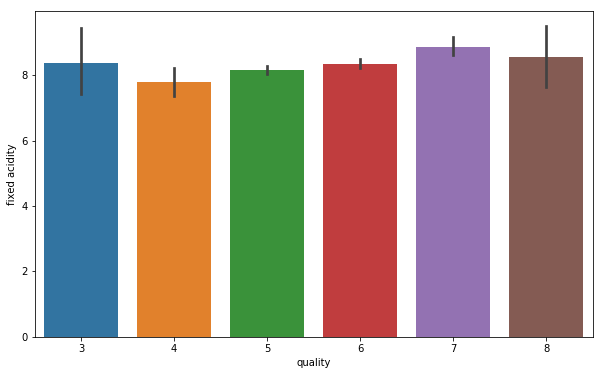

In [4]:
# Create a barplot of wine quality with the fixed acidity of the wines in the dataset. 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

Here we see that fixed acidity does not give any specification to classify the quality.

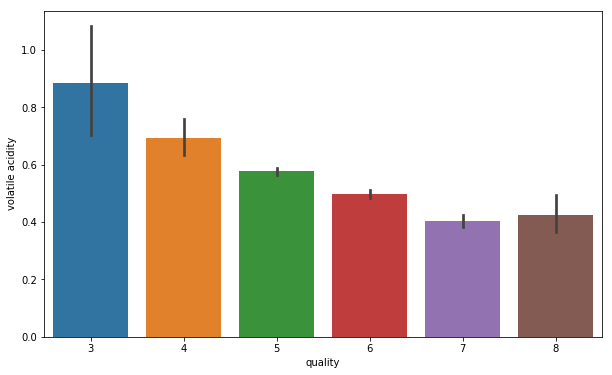

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality.

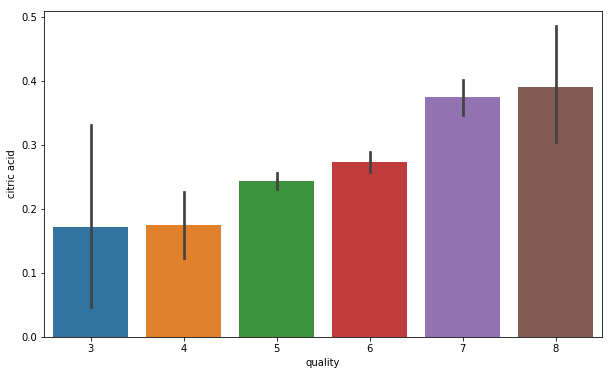

In [6]:
# Create a similar plot with the wine quality against the citric acid quantity in the data set.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

Composition of citric acid go higher as we go higher in the quality of the wine.

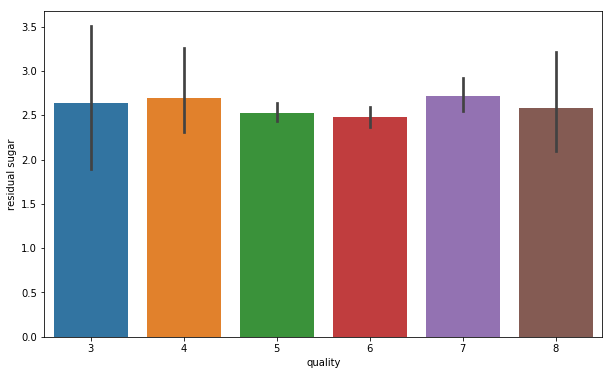

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

We can see, that hasn't got trend on sugar and quality.

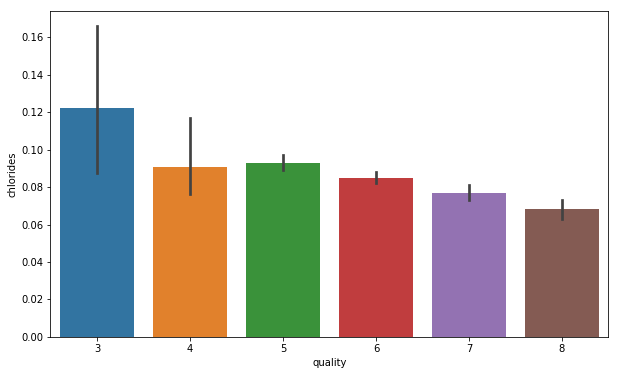

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

Composition of chloride also go down as we go higher in the quality of the wine

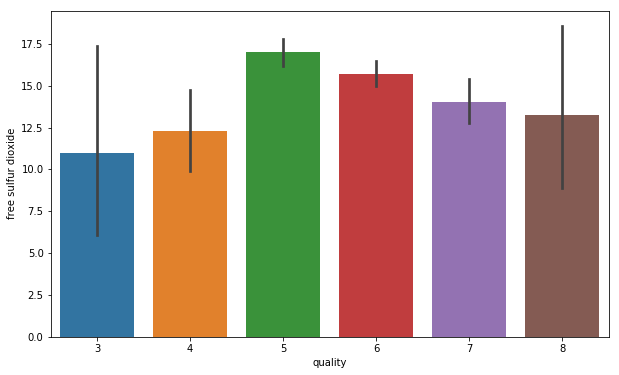

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

We can see, that hasn't got trend on free sulfur dioxide and quality.

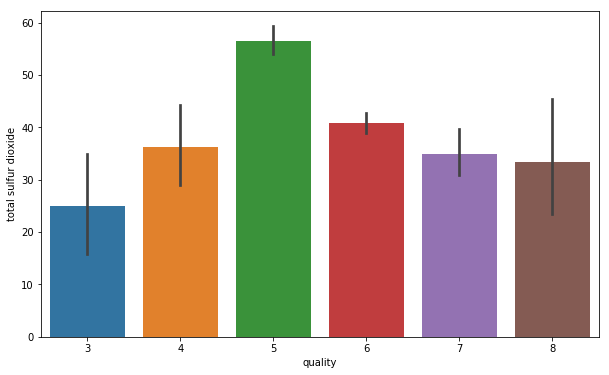

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

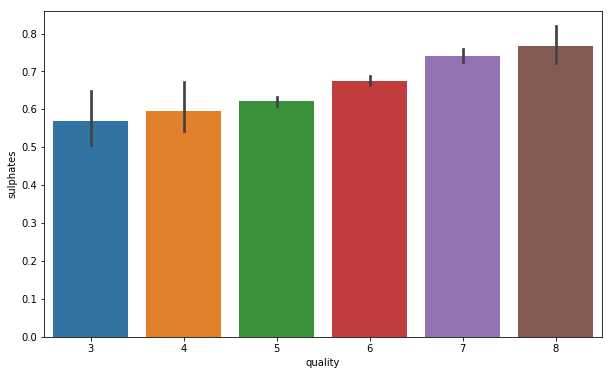

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Sulphates level goes higher with the quality of wine

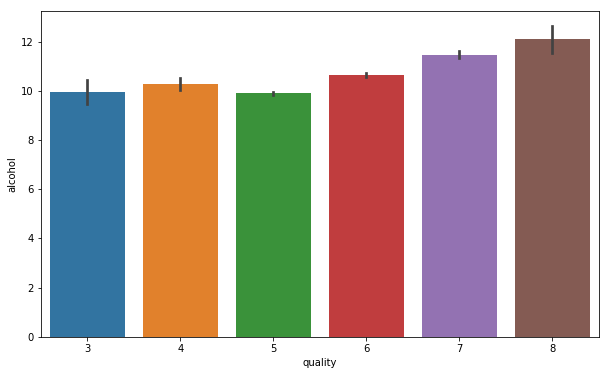

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Alcohol level also goes higher as te quality of wine increases

Here is the distribution of expert assessments of wines in the sample:

Text(0.5, 0, 'Quality')

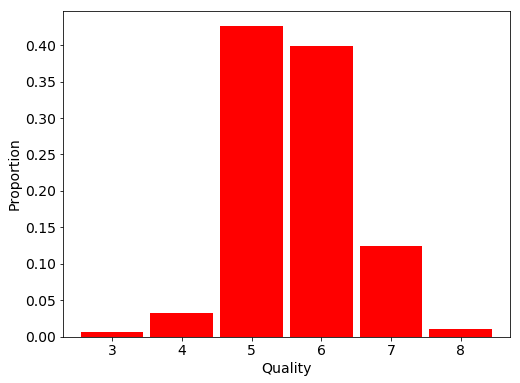

In [13]:
# Distribution of wine quality against the number of occurance in the dataset. 
plt.figure(figsize(8,6))
stat = wine.groupby('quality')['quality'].agg(lambda x : float(len(x)) / wine.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

Although not ideal, We can see, that data is close to a normal distribution.

Let's see heatmap correlation between features.

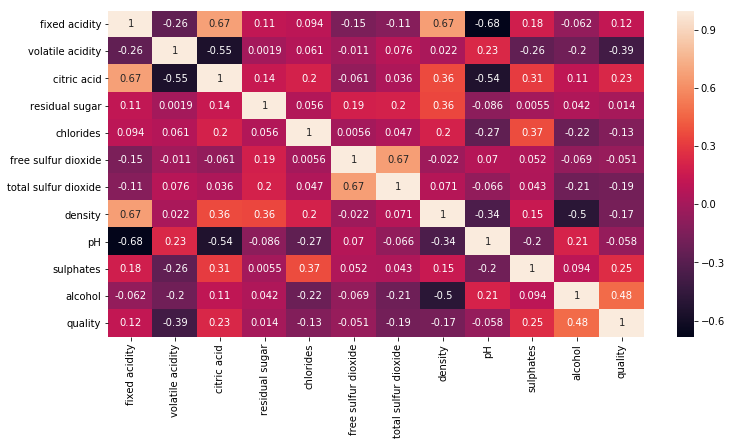

In [14]:
# Creating a heatmap with the corresponding variables in the dataset. This represents the pearson corelation of the columns.
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),annot=True)

Interesting, we can now see that acidity and pH level of wine are in inverse proportion. <br>
This result illustrates a fact from a chemisty: , **pH = -lg[H+], whehe [H+] in fact represents acidity. So, bigger acidity - lower pH level. **

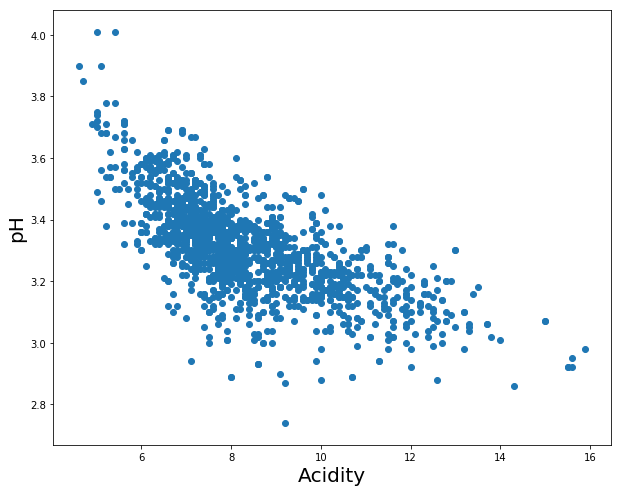

In [15]:
""" 
    Now that we have a known formula for acidity with respect to the pH, lets plot it in a graph.
    We would expect the acidity to be inversely proportional to the pH of the substance.
"""

plt.figure(figsize=(10,8))
plt.scatter(wine['fixed acidity'],wine['pH'])
plt.xlabel('Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

However, there is no direct connection between total acidity and pH (it is possible to find wines with a high pH for wine and high acidity).In wine tasting, the term “acidity” refers to the fresh, tart and sour attributes of the wine which are evaluated in relation to how well the acidity balances out the sweetness and bitter components of the wine such as tannins.

<b><center>Acidity is an important attribute contributing towards the quality of the wine.</center></b>

As much as modern health has demonized acidic foods, acidity is an essential trait in wine that’s necessary for quality. Great wines are in balance with their 4 fundamental traits (Acidity, tannin, alcohol and sweetness) and as wines age, the acidity acts as a buffer to preserve the wine longer. For example, Sauternes, a wine with both high acidity and sweetness, is known to age several decades.

### <center> 4. Insights and found dependencies

Summarise previous results, we can see that:
- The target variable is close to a normal disturbution;
- we can find dependency between volatile acidity/citric acid/chlorides/sulphates/alcohol and quality of wine that we can use in our model. It seems like this would be a good fit for a logistic regression

### <center> 5. Metrics selection

We can see that the classes are normally balanced. We making a classification task, and we can see, that we got some trends by features, and it's mean, that they can have weights. And it's offers to use MSE — measure of the quality of an estimator — it is always non-negative, and values closer to zero are better.

### <center> 6. Model selection

For our task we will consider the following models:
- **LogisticRegression**. A simple linear model is a good baseline in almost any classification problem. Its linear coefficients will also allow to assess the importance of a particular feature in the dataset, with the help of L1-regularization it will be possible to get rid of linearly dependent features.
- **RandomForest**. This is a tree based model that offers a good baseline but not easy to interpret. Usually we would see a better accuracy for random forest over logistic regression without any hyperparameter tuning.<br>

Also, we can use xgboost model (or catboost, or other busting gradient method) but I just want to give you baseline classification model. <br>
In the end I'll show some models without tuning parameters.

### <center> 7. Data preprocessing

The first check in the data preprocessing step is to check how many Nulls we have in the dataset. In our case, we do not see any nulls in any of the column. 

In [37]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see, that we don't have NaN values (its very good). So, most of preprocessing is over.

### <center> 8. Cross-validation and adjustment of model hyperparameters

In [38]:
# Start Modeling
# Split Training and Testing data (within training data file only)
# Hold out method validation

from sklearn.model_selection import train_test_split

X_train = wine.iloc[:,1:len(wine.columns)-2] # this represents the input Features
Y_train = wine.loc[:,'quality']


# Scaling features (only feature NOT observation)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Scaling - brings to range (0 to 1)
ScaleFn = MinMaxScaler()
X_Scale = ScaleFn.fit_transform(X_train)
# Standardise - brings to Zero mean, Unit variance
ScaleFn = StandardScaler()
X_Strd = ScaleFn.fit_transform(X_train)

#### Dimension reduction (PCA):

Another step in data preprocessing is dimension reduction. One very popular algorithm used in dimension reduction is called the PCA. PCA would convert the existing variables in to a set of orthogonal vectors the a different space. The usual approach when dealing with PCA is to select the first few output variables that capture most of the variabilty in the dataset. In our dataset, we have more than 8 variables - Let's check if PCA offers to reduce the dimensions in our case.

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_Strd)

Plot the graph to find the principal components

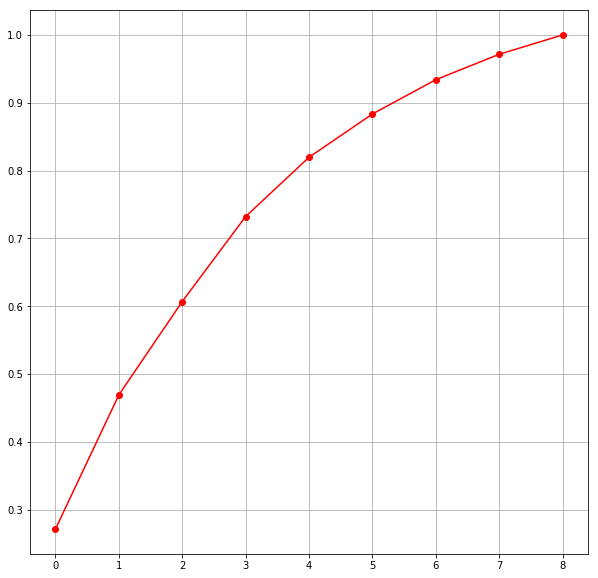

In [40]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 7 principal components attribute for ~97% of variation in the data. <br>
We shall pick the first 7 components for our prediction.

In [41]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_Strd)
print(x_new)

[[-1.85550029 -0.11566443 -1.09357046 ... -0.75643601 -0.54724227
  -0.12543802]
 [-0.80070544  1.49109015 -1.17367872 ... -0.24160267  1.08018456
  -0.54859163]
 [-0.84153176  0.44660569 -1.03827391 ... -0.2839886   0.65509512
  -0.22355232]
 ...
 [-0.75716274  0.69393496  0.80821779 ... -0.22768437  0.05590351
  -0.79624827]
 [-1.63220619  1.13054855  0.63442137 ... -0.43474156 -0.40891784
  -0.41109861]
 [ 0.4677948  -0.11499324  1.1798357  ...  0.6522725  -0.23266225
   0.34922552]]


## Some models that we would use to test the accuracy.

### 1. Logistic Regression
### 2. K nearest neighbor classifier
### 3. Decision tree classifier
### 4. Random Forest Classifier
### 5. SVM (Support Vector Machines)

In [42]:
## we will use different model and see how to the models fare with the default parameters. 

test_size = .30 # split the training datset in to 70-30 split. We will perform cross validation on the remaining part.
seedNo = 11 # setting the seed to make the results reproducable. 


X_train,X_test,Y_train,Y_test = train_test_split(x_new,Y_train,test_size = test_size, random_state = seedNo)

print("train X", X_train.shape)
print("train Y", Y_train.shape)
print("test X", X_test.shape)
print("test Y", Y_test.shape)

# Choose algorithm and train
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mymodel = []
mymodel.append(('LogReg', LogisticRegression()))
mymodel.append(('KNN', KNeighborsClassifier()))
mymodel.append(('DeciTree', DecisionTreeClassifier()))
mymodel.append(('RandForest', RandomForestClassifier()))
mymodel.append(('SVM', SVC()))



All_model_result = []
All_model_name = []
for algoname, algorithm in mymodel:    
    kfoldFn = KFold(n_splits = 11, random_state = seedNo)
    Eval_result = cross_val_score(algorithm, X_train, Y_train, cv = kfoldFn, scoring = 'accuracy')
    
    All_model_result.append(Eval_result)
    All_model_name.append(algoname)
    print("Modelname and Model accuracy:", algoname, 100*Eval_result.mean(),"%")


train X (1119, 8)
train Y (1119,)
test X (480, 8)
test Y (480,)
Modelname and Model accuracy: LogReg 54.50927445685744 %
Modelname and Model accuracy: KNN 55.67939146855863 %
Modelname and Model accuracy: DeciTree 56.83274209773918 %
Modelname and Model accuracy: RandForest 60.85755634386968 %
Modelname and Model accuracy: SVM 59.42623674132119 %


## Random Forest

In [43]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(X_train, Y_train)
sqrt(mean_squared_error(rf.predict(X_train), Y_train))
sqrt(mean_squared_error(rf.predict(X_test), Y_test))

0.639797547563351

A true evaluation of wines and their predictions of a random forest:

Text(0, 0.5, 'Estimated quality')

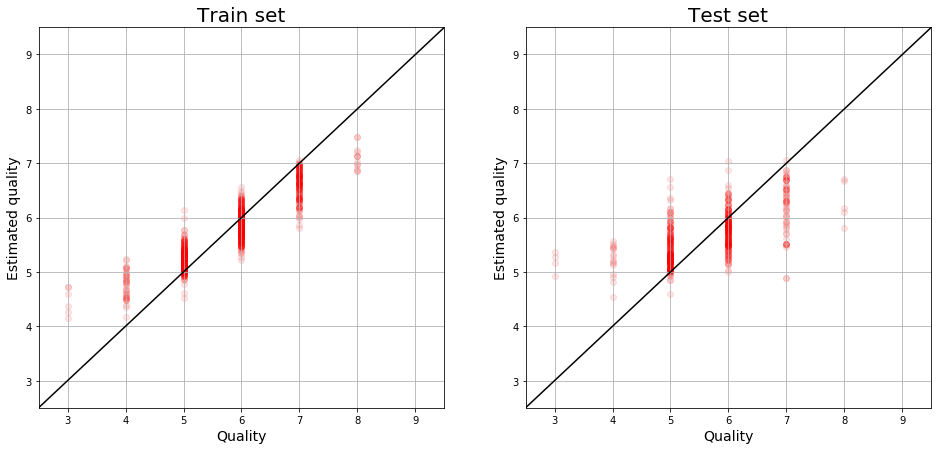

In [44]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(Y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(Y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

The coefficient of determination for the random forest:

In [45]:
rf.score(X_test, Y_test)

0.3789369943209008

### <center> 9. Conclusion

In conclusion, I want to say, that we can:
- use stacking model;
- generate new features;
- find more insights;
- use other metrics and models.<br>

Thank you for listening!